# Galaxy Images classification using CNN

In [1]:
#Install astroNN package
!pip install astroNN

In [19]:
#import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

In [6]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [7]:
#Load data
images, labels = galaxy10.load_data()

C:\Users\91801\.astroNN\datasets\Galaxy10.h5 was found!


In [8]:
#Defining features corresponding to each label
features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

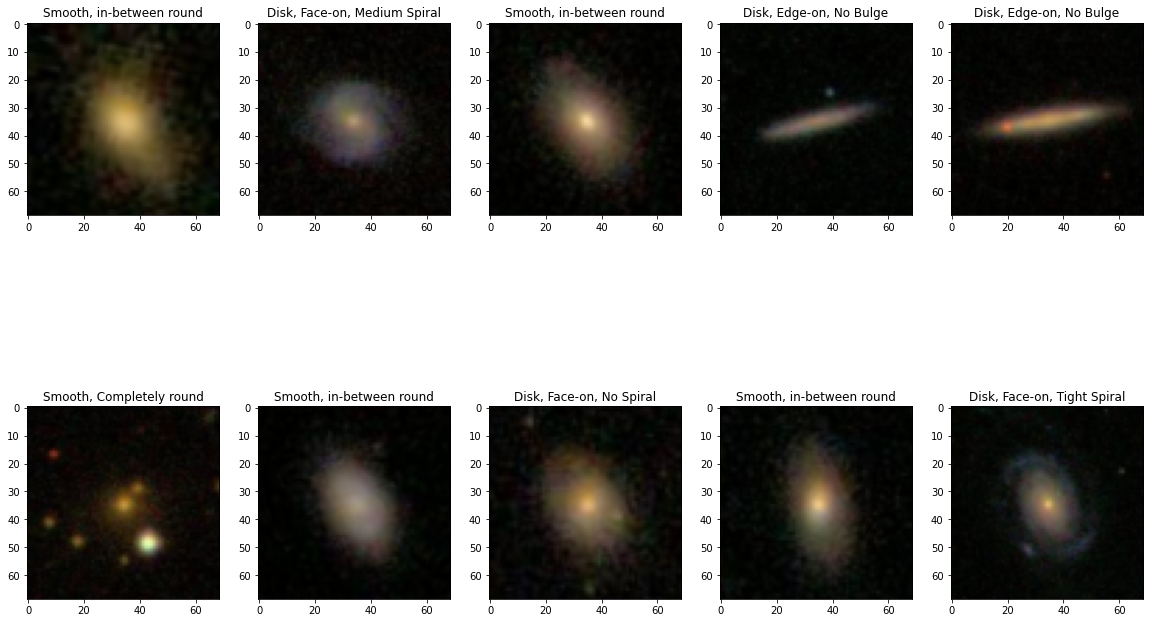

In [9]:
#Displaying randon 10 images with corresponding classes
fig = plt.figure(figsize=(20,20)) 
rows = 3
columns = 5
for i in range(10):
    index = np.random.randint(0,images.shape[0])
    plt.subplot(rows,columns,i+1)    
    plt.title(features[labels[index]])
    plt.imshow(images[index])
plt.show()

In [10]:
#Displaying number of galaxies in each category
df = pd.DataFrame(data=labels)
number_of_galaxies = df.value_counts().sort_index()
print("Number of galaxies in each category")
print(number_of_galaxies)

Number of galaxies in each category
0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


In [11]:
#Split the data into a 80 : 20 training and testing set and display the shape
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)
print("Shape of train data:",x_train.shape)
print("Shape of test data:",x_test.shape)

Shape of train data: (17428, 69, 69, 3)
Shape of test data: (4357, 69, 69, 3)


In [12]:
#Normalize the pixel values of train and test images
x_train = x_train /255.0
x_test = x_test /255.0

In [13]:
from functools import partial


In [14]:
#Building CNN model
DefaultConv2D = partial(keras.layers.Conv2D,kernel_size=3, activation='relu', padding="SAME")
model = keras.models.Sequential([DefaultConv2D(filters=64, kernel_size=3, input_shape=[69,69,3]),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=128),
DefaultConv2D(filters=128),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=256),
DefaultConv2D(filters=256),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(units=128, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=64, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=32, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=10, activation='softmax'),
])

In [15]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 256)       2

In [16]:
#Reserve 20% training samples for validation
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [21]:
#Model training
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train1, y_train1, epochs=3,batch_size=64,validation_data=(x_val, y_val))

Epoch 1/3
218/218 [==============================] - 619s 2s/step - loss: 1.9861 - accuracy: 0.2760 - val_loss: 1.7097 - val_accuracy: 0.3442
Epoch 2/3
218/218 [==============================] - 521s 2s/step - loss: 1.8144 - accuracy: 0.3117 - val_loss: 1.6246 - val_accuracy: 0.4260
Epoch 3/3
218/218 [==============================] - 523s 2s/step - loss: 1.7168 - accuracy: 0.3437 - val_loss: 1.5629 - val_accuracy: 0.4650


In [22]:
# Evaluate the model on the test data
results = model.evaluate(x_test, y_test, batch_size=128)

35/35 [==============================] - 42s 1s/step - loss: 1.5565 - accuracy: 0.4636


In [23]:
#Report of training, validation and testing accuracies of the model
print("Training loss:",history.history['loss'][1])
print("Validation loss:",history.history['val_loss'][1])
print("Test loss:", results[0])
print("Training accuracy:",history.history['accuracy'][1])
print("Validation accuracy:",history.history['val_accuracy'][1])
print("Test accuracy:", results[1])

Training loss: 1.8143614530563354
Validation loss: 1.6245981454849243
Test loss: 1.5564548969268799
Training accuracy: 0.31171998381614685
Validation accuracy: 0.42598968744277954
Test accuracy: 0.46362176537513733


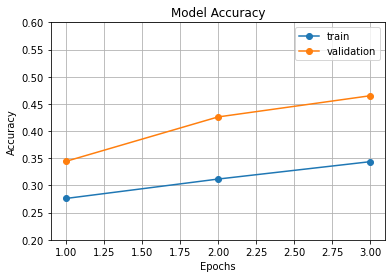

In [25]:
#Training-Validation accuracy plot
x = np.linspace(1,3,3)
fig1 = plt.gcf()
plt.plot(x,history.history['accuracy'],marker = 'o')
plt.plot(x,history.history['val_accuracy'],marker = 'o')
plt.axis(ymin=0.2,ymax=0.6)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()